In [1]:
import pandas as pd

file_path = "../data/household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory= False)

print("First 5 rows: ")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nShape:", df.shape)

First 5 rows: 
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 colum

In [2]:
import numpy as np  # For np.nan

# Replace '?' with np.nan
df.replace('?', np.nan, inplace=True)

# Convert numeric columns to appropriate types
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_cols] = df[numeric_cols].astype(float)

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Display the first 5 rows after preprocessing
print("First 5 rows after preprocessing:")
print(df.head())

# Display updated info
print("\nUpdated Info:")
print(df.info())

First 5 rows after preprocessing:
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.

In [3]:
# Handle missing values using forward fill
df.ffill(inplace=True)  # Updated to use ffill() instead of fillna(method='ffill')

# Verify no missing values remain
print("Missing values after forward fill:")
print(df.isna().sum())

# Display the first 5 rows after handling missing values
print("\nFirst 5 rows after handling missing values:")
print(df.head())

Missing values after forward fill:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

First 5 rows after handling missing values:
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4  

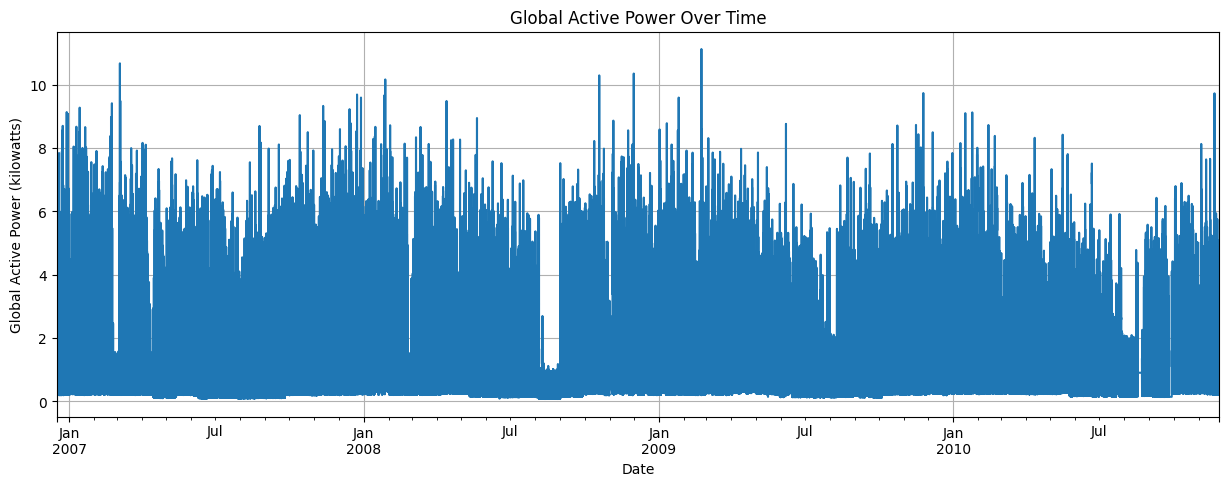

In [4]:
import matplotlib.pyplot as plt

# Plot Global_active_power over time
plt.figure(figsize=(15, 5))
df['Global_active_power'].plot()
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

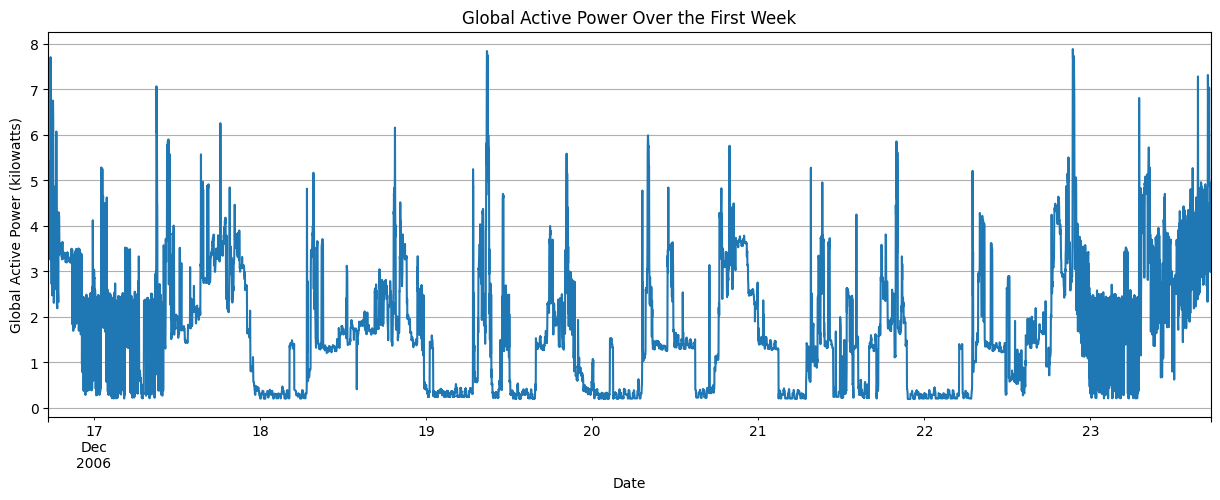

In [5]:
# Plot Global_active_power for the first week of data
plt.figure(figsize=(15, 5))
df['Global_active_power'].iloc[:10080].plot()  # 10080 minutes = 1 week (7 days * 24 hours * 60 minutes)
plt.title('Global Active Power Over the First Week')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()